# * Kurapati Venkatesh

# * 09012021

# * Topic: Lasso & Ridge Regression  ✨🐱‍🏍

# ---------------------------------------------------------------------------

## Problem Statement:

## An online car sales platform would like to improve its customer base and their experience by providing them an easy way  to buy and sell cars. For this, they would like to have an automated model which can predict the price of the car if user inputs the required factors. Help the business achieve the objective by applying Lasso and Ridge regression model on it.

## Please use the below columns for the analysis purpose.

## Price, Age_08_04, KM,  HP,   cc,  Doors , Gears, Quarterly_Tax, Weight

## -----------------------------------------------------------------------------------

### Problem Objective:
##### To prepare a prediction model  - To perform the Lasso and Ridge regression on the given data to predict the price of the car

## -------------------------------------------------------------------------------------------

## load libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## import dataset:

In [2]:
toyota = pd.read_csv(r"G:\360digit\assignments meterial\lasso ridge regression\ToyotaCorolla (1).csv")

In [3]:
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
toyota1= toyota.iloc[:,[2,3,6,8,12,13,15,16,17]]
toyota1.rename(columns={"Age_08_04":"Age"},inplace=True)

C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


## EDA:

In [5]:
toyota1.describe()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


{'whiskers': [<matplotlib.lines.Line2D at 0x187da006040>,
 'caps': [<matplotlib.lines.Line2D at 0x187da006700>,
 'boxes': [<matplotlib.lines.Line2D at 0x187d9fedca0>,
 'medians': [<matplotlib.lines.Line2D at 0x187da006dc0>,
 'fliers': [<matplotlib.lines.Line2D at 0x187da262160>,
 'means': []}

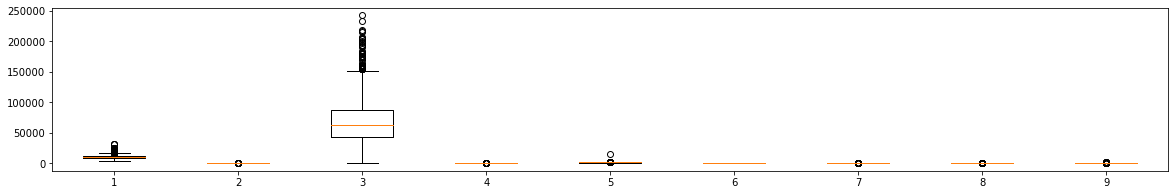

In [6]:
plt.figure(figsize=(20,3))
plt.boxplot(toyota1)

- All the data is not normally distributed. Price, Age, KM, HP, Quarterly_Tax and Weight have outliers. 

In [7]:
import statsmodels.api as sm

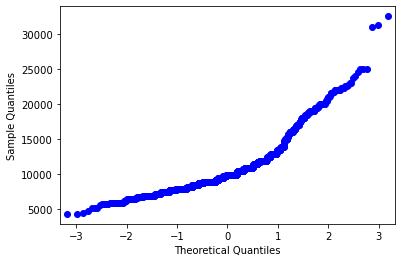

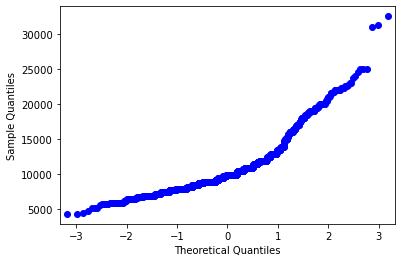

In [8]:
sm.graphics.qqplot(toyota1["Price"]) ##shows the data "Price" is not normal 

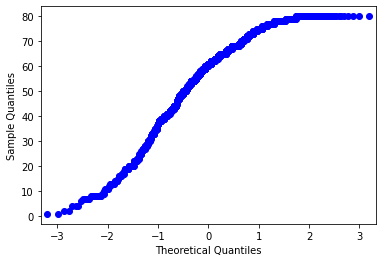

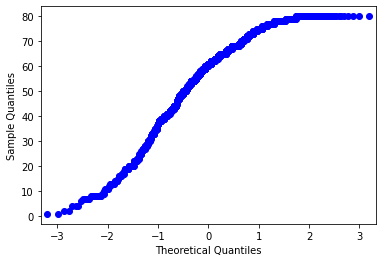

In [9]:
sm.graphics.qqplot(toyota1["Age"])## shows "Age" is not normal. Data is discrete count 

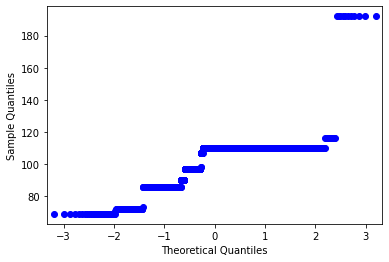

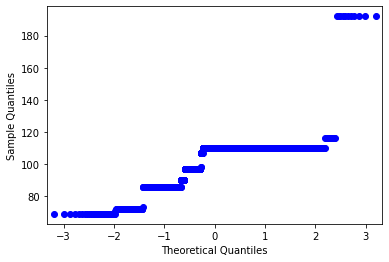

In [10]:
sm.graphics.qqplot(toyota1["HP"])## Data is discrete count

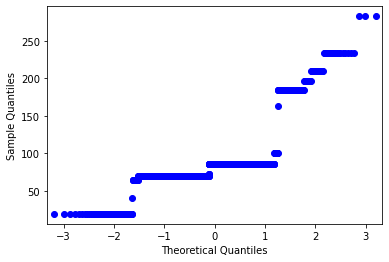

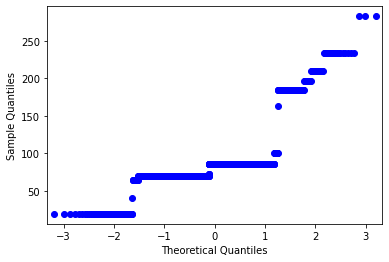

In [11]:
sm.graphics.qqplot(toyota1["Quarterly_Tax"]) ## Data is discrete count

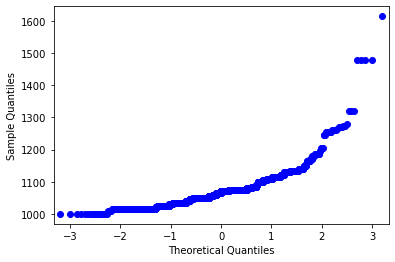

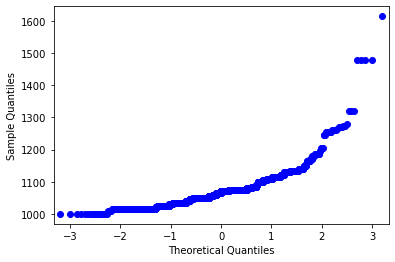

In [12]:
sm.graphics.qqplot(toyota1["Weight"]) ## Data is not normal. And it shows it is discrete count

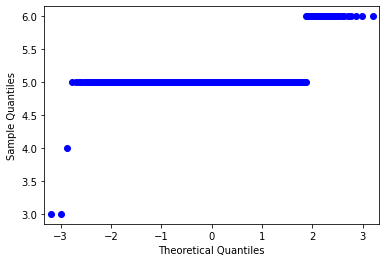

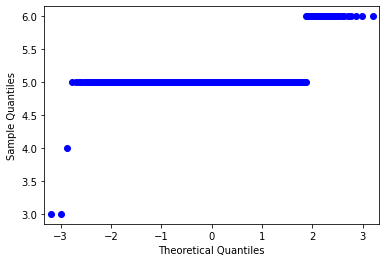

In [13]:
sm.graphics.qqplot(toyota1["Gears"]) ## Data is discrete categorical

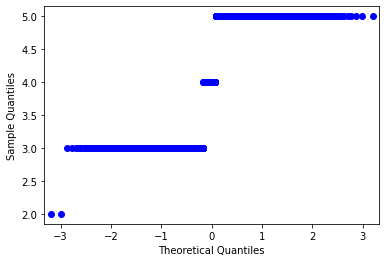

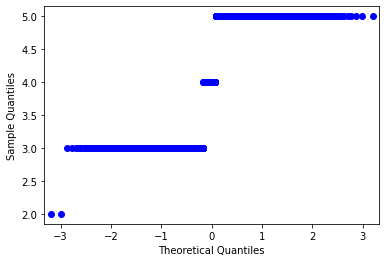

In [14]:
sm.graphics.qqplot(toyota1["Doors"]) ## Data is discrete categorical 

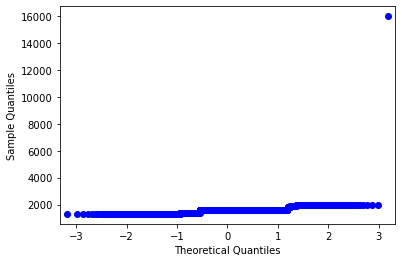

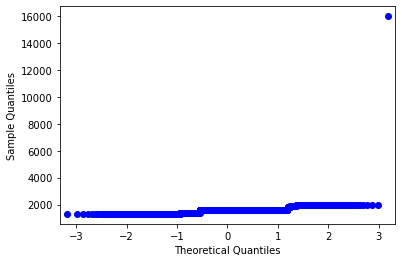

In [15]:
sm.graphics.qqplot(toyota1["cc"]) ## Again data is discrete count data.

(array([110., 706., 343., 114.,  75.,  59.,  22.,   4.,   0.,   3.]),
 array([ 4350.,  7165.,  9980., 12795., 15610., 18425., 21240., 24055.,
        26870., 29685., 32500.]),
 <BarContainer object of 10 artists>)

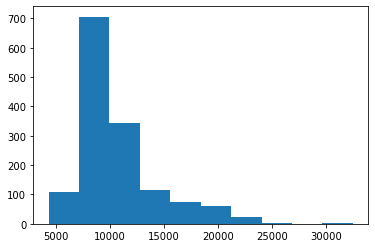

In [16]:
plt.hist(toyota1["Price"]) ## This shows that Price is right skewed

(array([ 24.,  36.,  62.,  64., 108., 127., 182., 247., 287., 299.]),
 array([ 1. ,  8.9, 16.8, 24.7, 32.6, 40.5, 48.4, 56.3, 64.2, 72.1, 80. ]),
 <BarContainer object of 10 artists>)

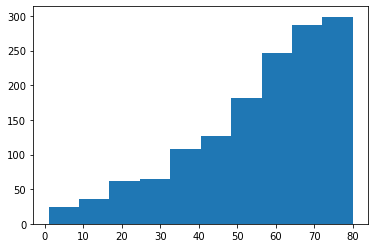

In [17]:
plt.hist(toyota1["Age"]) ## This shows the data is highly left skewed

(array([109., 285., 166., 865.,   0.,   0.,   0.,   0.,   0.,  11.]),
 array([ 69. ,  81.3,  93.6, 105.9, 118.2, 130.5, 142.8, 155.1, 167.4,
        179.7, 192. ]),
 <BarContainer object of 10 artists>)

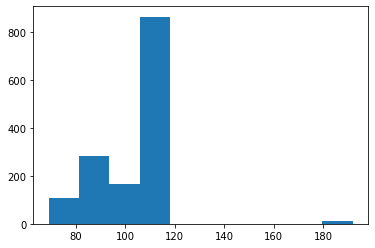

In [18]:
plt.hist(toyota1["HP"])## The data is very unevenly distributed, Left skewed

(array([ 73., 577., 616.,  19.,   0.,   1., 110.,  18.,  19.,   3.]),
 array([ 19. ,  45.4,  71.8,  98.2, 124.6, 151. , 177.4, 203.8, 230.2,
        256.6, 283. ]),
 <BarContainer object of 10 artists>)

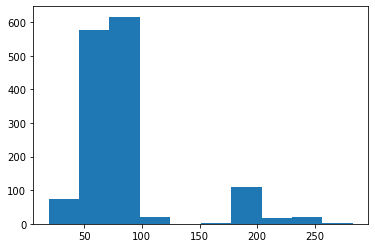

In [19]:
plt.hist(toyota1["Quarterly_Tax"]) # The data is unevenly distributed, right skewed data

(array([664., 620., 107.,  18.,  19.,   3.,   0.,   4.,   0.,   1.]),
 array([1000. , 1061.5, 1123. , 1184.5, 1246. , 1307.5, 1369. , 1430.5,
        1492. , 1553.5, 1615. ]),
 <BarContainer object of 10 artists>)

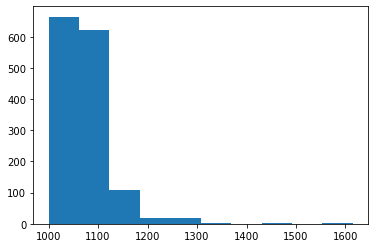

In [20]:
plt.hist(toyota1["Weight"]) # The data is right skewed.

- Doors and Gears are categorical data(set of values being repeating itself)

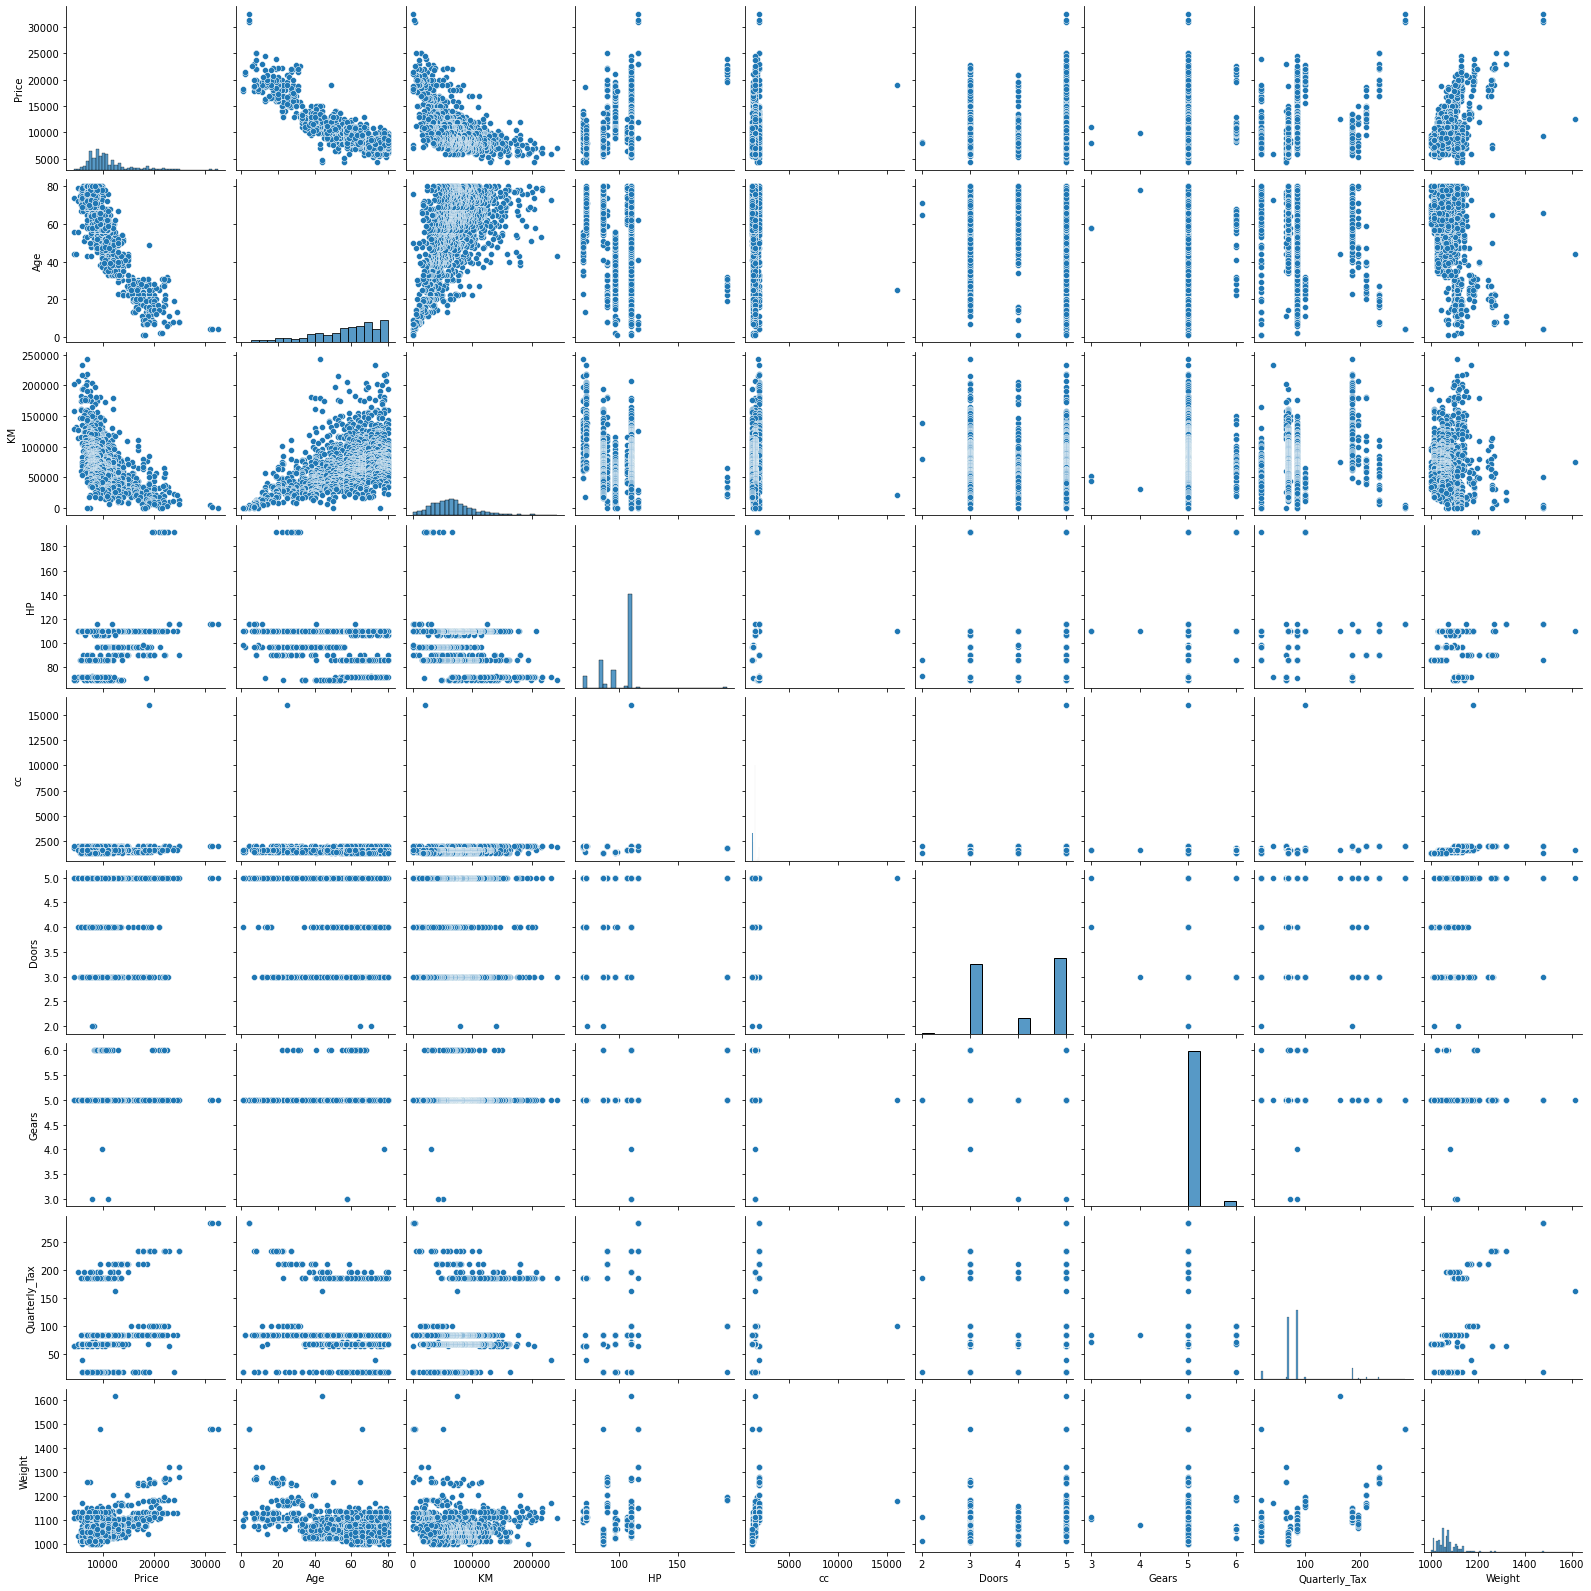

In [21]:
import seaborn as sn
sn.pairplot(toyota1)
correlation_values= toyota1.corr()

## Lasso Regression:

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [23]:
lasso = Lasso()

In [24]:
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5 ,10, 20]}

In [25]:
lasso_reg = GridSearchCV(lasso, parameters, scoring = 'r2', cv = 5)
lasso_reg.fit(toyota1.iloc[:, 1:],toyota1.Price )

C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 611675627.9099085, tolerance: 369220.120596777
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1008141535.8368806, tolerance: 1797424.5574147957
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1085408930.829983, tolerance: 1767872.2814565713
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\sklearn\linear_model\_coordinate

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='r2')

In [26]:
lasso_reg.best_params_

{'alpha': 20}

In [27]:
lasso_reg.best_score_

0.03361731954992044

In [28]:
lasso_pred = lasso_reg.predict(toyota1.iloc[:, 1:])

#### Adjusted r-square:

In [29]:
lasso_reg.score(toyota1.iloc[:, 1:], toyota1.Price)

0.8628616158045578

#### RMSE:

In [30]:
np.sqrt(np.mean((lasso_pred - toyota1.Price)**2))

1342.6770312748686

## Ridge Regression:

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [32]:
ridge = Ridge()

In [33]:
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5 ,10, 20]}

In [34]:
ridge_reg = GridSearchCV(ridge, parameters, scoring = 'r2', cv = 5)
ridge_reg.fit(toyota1.iloc[:, 1:], toyota1.Price)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='r2')

In [37]:
ridge_reg.best_params_

{'alpha': 20}

In [36]:
ridge_reg.best_score_

0.031727795992864086

In [39]:
ridge_pred = ridge_reg.predict(toyota1.iloc[:, 1:])

#### Adjusted r-square:

In [40]:
ridge_reg.score(toyota1.iloc[:, 1:], toyota1.Price)

0.8636841080334173

#### RMSE:

In [41]:
np.sqrt(np.mean((ridge_pred - toyota1.Price)**2))

1338.644599923682

## ElasticNet Regression:

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

In [43]:
enet = ElasticNet()

In [44]:
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5 ,10, 20]}

In [45]:
enet_reg = GridSearchCV(enet, parameters, scoring = 'neg_mean_squared_error', cv = 5)
enet_reg.fit(toyota1.iloc[:, 1:], toyota1.Price)

C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 611676307.5863366, tolerance: 369220.120596777
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1008141556.6754496, tolerance: 1797424.5574147957
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1085404306.4479942, tolerance: 1767872.2814565713
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\sklearn\linear_model\_coordinat

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [46]:
enet_reg.best_params_

{'alpha': 1}

In [47]:
enet_reg.best_score_

-3691214.729260399

In [49]:
enet_pred = enet_reg.predict(toyota1.iloc[:, 1:])

#### Adjusted r-square:

In [50]:
enet_reg.score(toyota1.iloc[:, 1:], toyota1.Price)

-1801108.3480971695

#### RMSE:

In [51]:
np.sqrt(np.mean((enet_pred - toyota1.Price)**2))

1342.0537798825983

Among all the models Ridge regression is the good model.